In [18]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

%load_ext autoreload
%autoreload 2


R = 4
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

n = 2
a = np.random.randn(n,n)
b = np.random.randn(n,n)

def random_trig(theta, phi):
    return sum([sum([a[i,j]*np.cos((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)])

def trig_vf(tp):
    phi = tp[1]
    theta = tp[0]
    return np.array([sum([sum([-a[i,j]*(i+1)*np.sin((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)]),
            sum([sum([a[i,j]*np.cos((i+1)*theta)*(j+1)*np.cos((j+1)*phi) for i in range(n)]) for j in range(n)])])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
def flow(init_tps):
    dt = 0.02
    num_steps = 25

    tps = np.empty((num_steps + 1, 2))  
    tps[0] = init_tps

    for i in range(num_steps):
        tps[i + 1] = tps[i] + trig_vf(tps[i]) * dt

    xyzs = np.empty((num_steps + 1, 4))  
    for i in range(num_steps+1):
        xyzs[i][0] = dt*i
        xyzs[i][1:] = torus_point(tps[i][0], tps[i][1])

    xyz_coords = np.empty((num_steps+1, 3))
    for i in range(num_steps+1):
        xyz_coords[i] = xyzs[i][1:]
    return xyzs, xyz_coords


N = 400
sqrt_N = 20.00
xyzs = [0 for i in range(N)]
xyz_coords = [0 for i in range(N)]
for i in range(N):
    xyzs[i], xyz_coords[i] = flow((2*math.pi*int(i/sqrt_N)/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N))

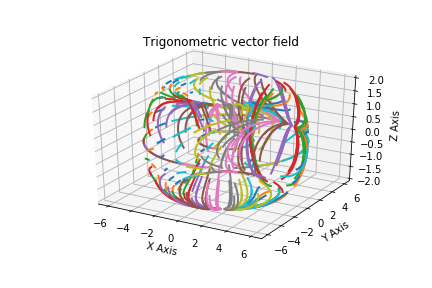

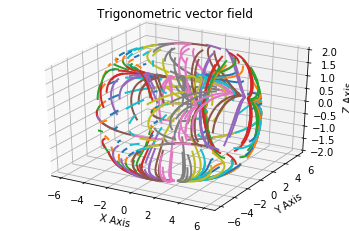

In [22]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(N):
    ax.plot(*xyz_coords[i].T, lw=2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Trigonometric vector field")

plt.show()
traj_list = xyzs

In [7]:
t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(traj_list)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='torus_random_vf.npy')
if load == True:
    t2s.load_bifilt(filename='torus_random_vf.npy')

|████████████████████████████████████████| 2016/2016 [100%] in 6:27.3 (5.20/s)              ▂▂▄ 18/2016 [1%] in 4s (4.8/s, eta: 7:02)        ▂▄▆ 56/2016 [3%] in 12s (4.7/s, eta: 6:59)      in 15s (4.7/s, eta: 6:52)       ▃▅▇ 73/2016 [4%] in 16s (4.6/s, eta: 6:56)       (4.6/s, eta: 7:03)      (4.5/s, eta: 7:05)      in 21s (4.6/s, eta: 7:01)           ▃▁▃ 148/2016 [7%] in 33s (4.5/s, eta: 6:52)      158/2016 [8%] in 35s (4.5/s, eta: 6:51)      (4.5/s, eta: 6:50)      182/2016 [9%] in 40s (4.5/s, eta: 6:47)     189/2016 [9%] in 42s (4.5/s, eta: 6:48)     (4.5/s, eta: 6:43)     ▆█▆ 254/2016 [13%] in 56s (4.5/s, eta: 6:32)      in 1:00 (4.5/s, eta: 6:27)     ▇▅▃ 278/2016 [14%] in 1:01 (4.5/s, eta: 6:24)   ▃▅▇ 288/2016 [14%] in 1:04 (4.5/s, eta: 6:22)      ▅▇▇ 310/2016 [15%] in 1:08 (4.6/s, eta: 6:15)        348/2016 [17%] in 1:16 (4.6/s, eta: 6:06)    358/2016 [18%] in 1:18 (4.6/s, eta: 6:03)       ▇▅▃ 367/2016 [18%] in 1:20 (4.6/s, eta: 6:01)    373/2016 [19%] in 1:22 (4.6/s, eta: 6:00) 

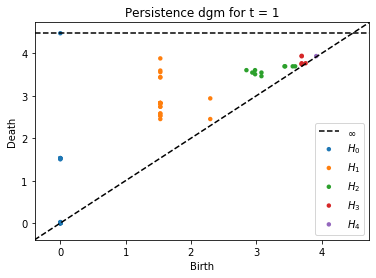

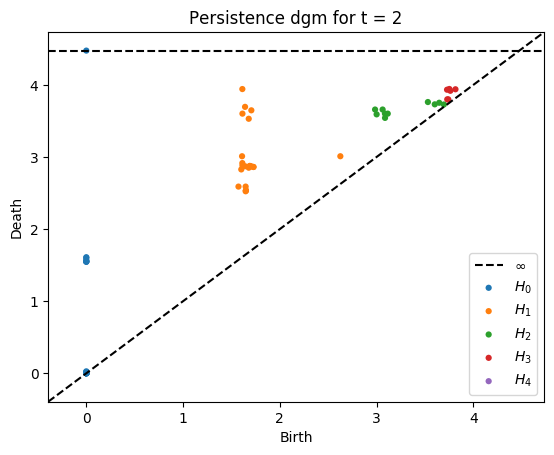

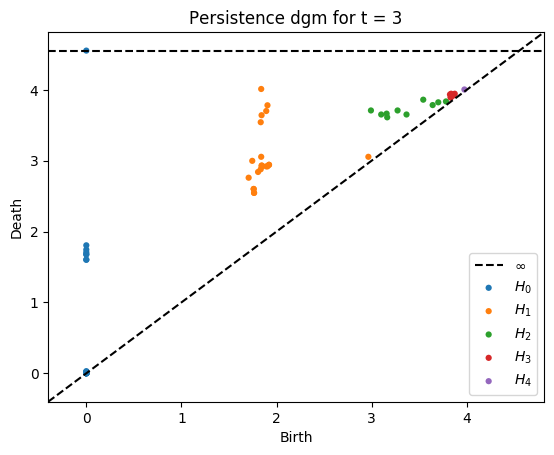

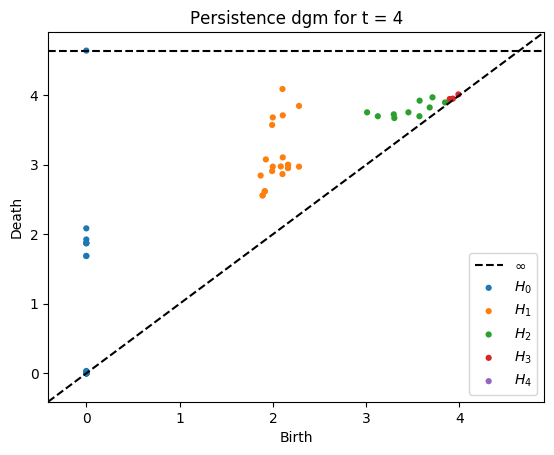

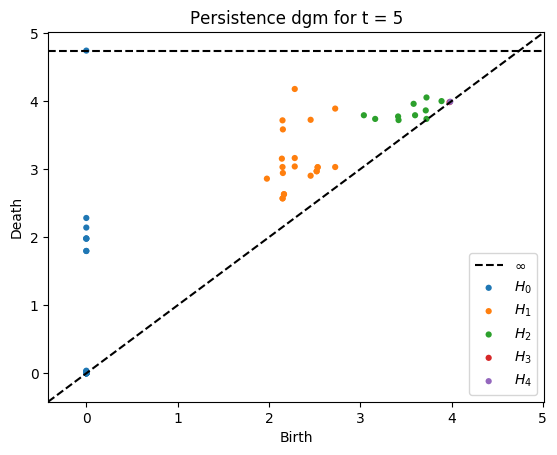

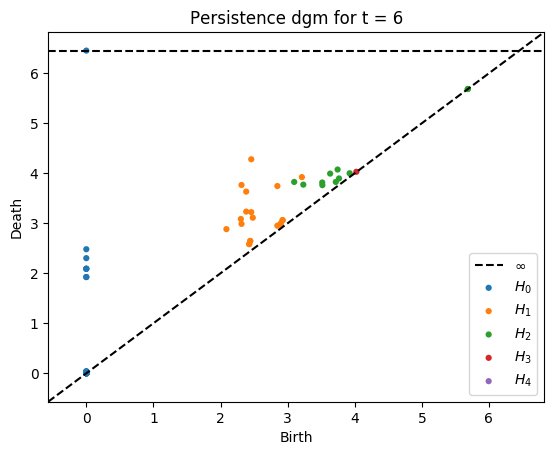

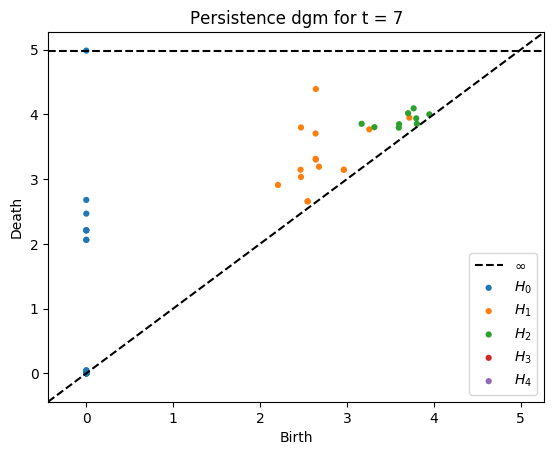

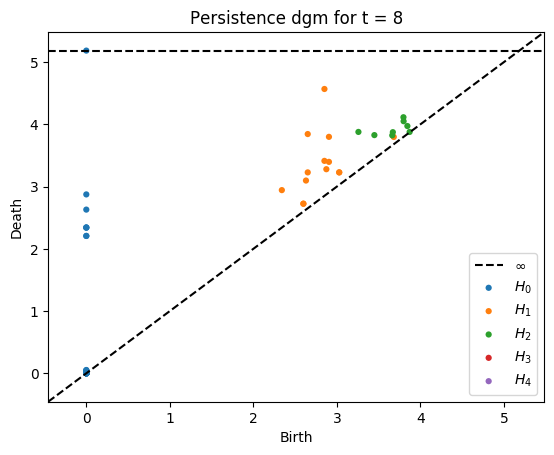

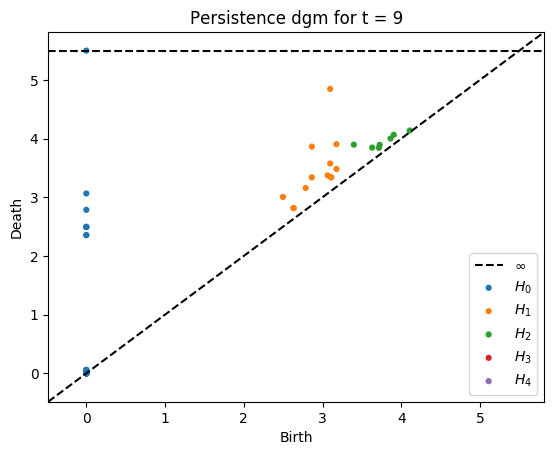

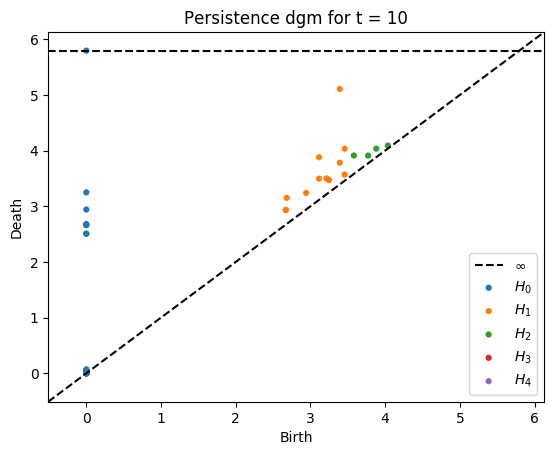

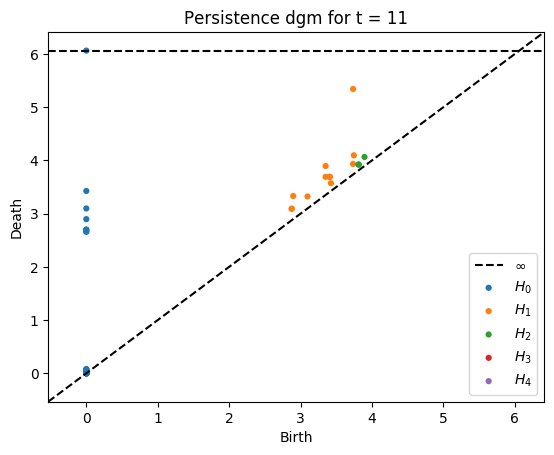

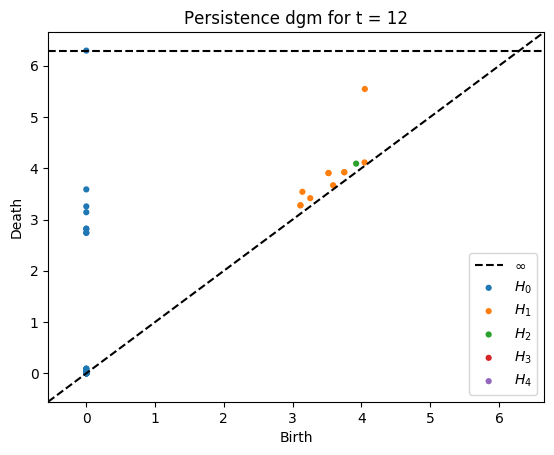

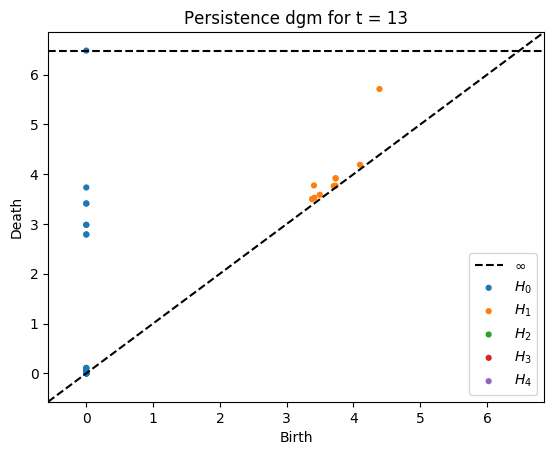

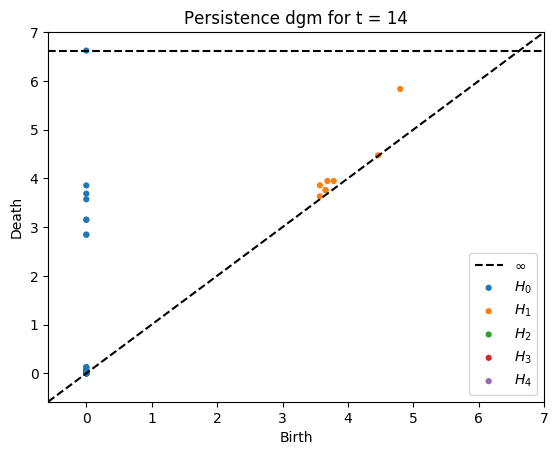

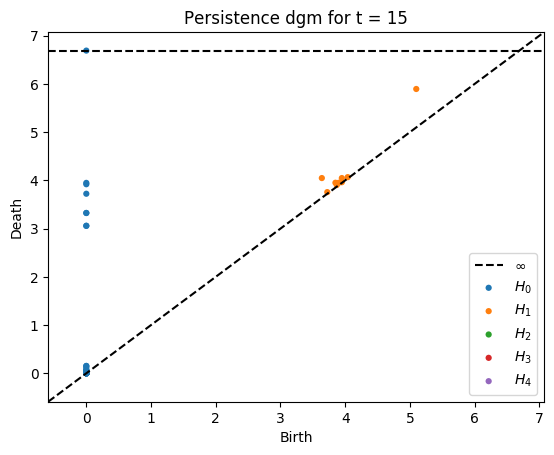

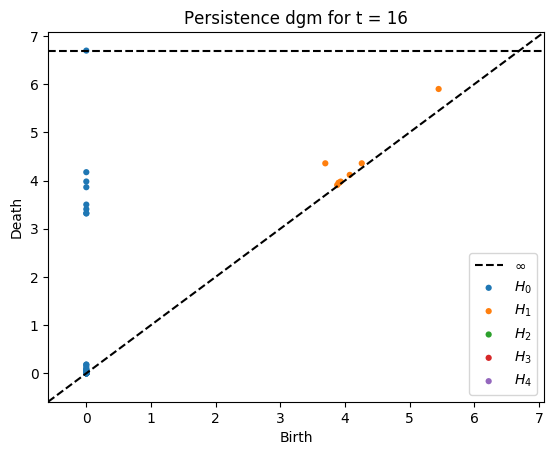

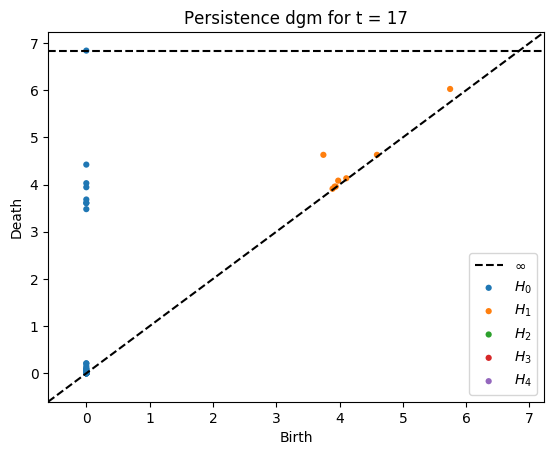

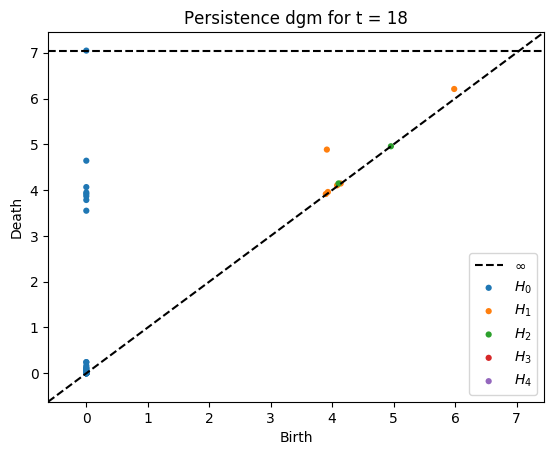

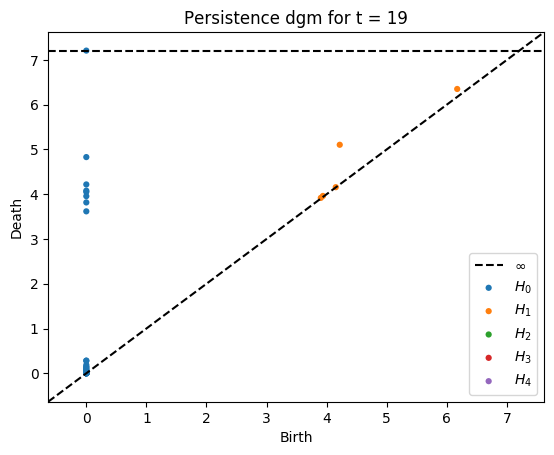

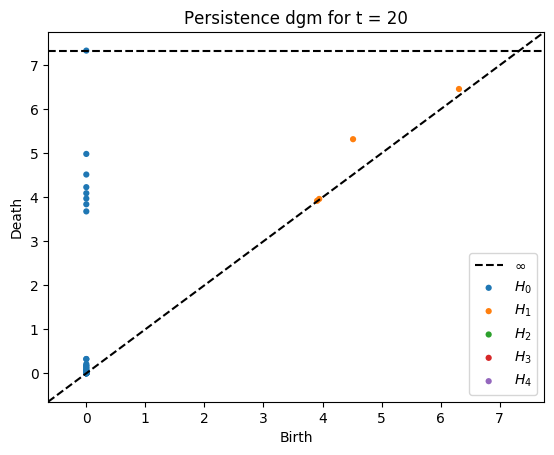

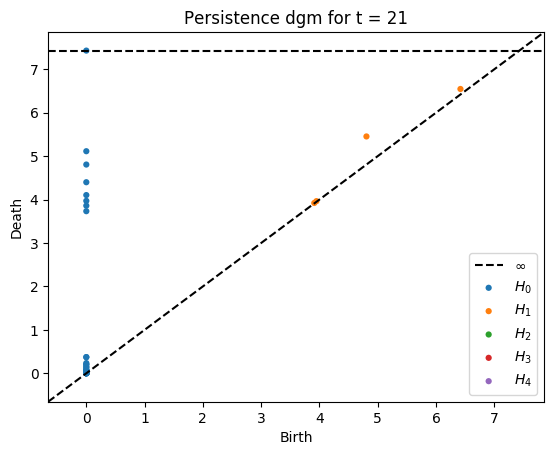

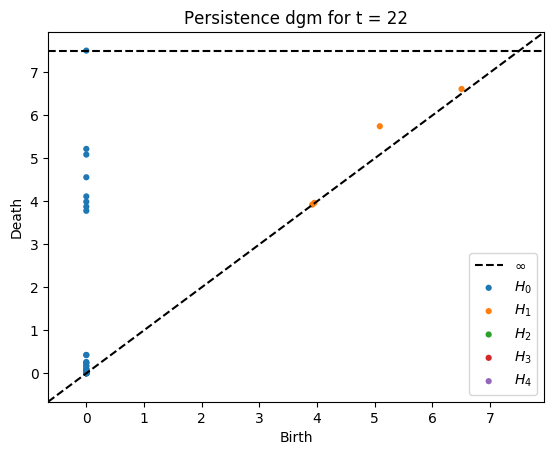

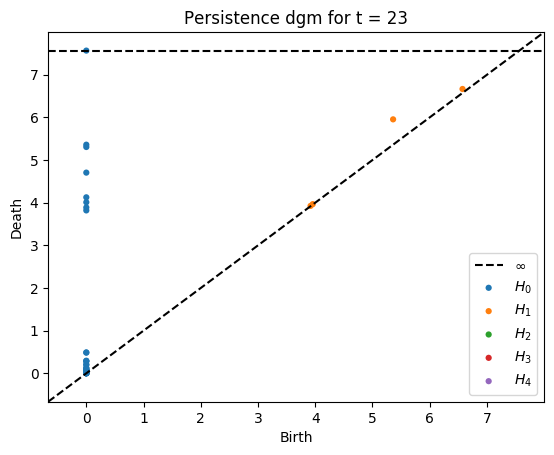

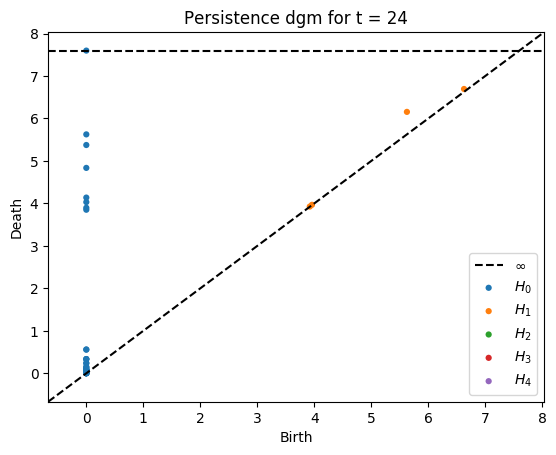

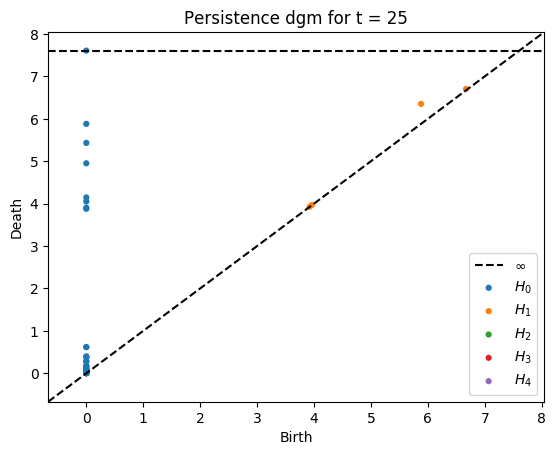

In [12]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)